In [1]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
%matplotlib inline

sys.version

C:\Users\okerinde\anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'3.5.5 |Anaconda custom (64-bit)| (default, Apr  7 2018, 04:52:34) [MSC v.1900 64 bit (AMD64)]'

In [2]:
df = pd.read_csv('C:/Users/okerinde/Documents/datasets/pgora/100k_kmeans.csv')

In [3]:
df.head()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_12,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21
0,81,14,58,108,83,60,82,61,64,94,...,27,28,87,73,69,25,7,77,95,5
1,81,92,16,44,95,64,110,98,95,105,...,119,42,5,40,105,118,48,40,62,45
2,75,20,66,104,20,65,80,97,2,81,...,63,119,115,118,64,68,46,45,43,18
3,30,42,65,108,67,81,85,32,83,48,...,21,107,79,44,90,6,25,46,102,62
4,117,20,52,40,25,36,87,78,99,70,...,31,92,21,34,102,37,46,11,9,66


In [4]:
df.describe()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_12,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21
count,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,...,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000
mean,59.509493,59.613105,59.559173,59.543603,59.686109,59.613883,59.440742,59.491522,59.377003,59.438672,...,59.319691,59.543167,59.274597,59.414483,59.446979,59.606592,59.438131,59.456064,59.474263,59.439536
std,34.750754,34.576932,34.592964,34.680237,34.696206,34.616714,34.615860,34.660048,34.614028,34.584374,...,34.679468,34.676910,34.589940,34.654900,34.656950,34.539191,34.644679,34.588076,34.665599,34.593827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,30.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,30.000000,29.000000,30.000000,29.000000,29.000000
50%,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,60.000000,59.000000,59.000000,59.000000,60.000000
75%,90.000000,90.000000,89.000000,90.000000,90.000000,90.000000,90.000000,90.000000,89.000000,89.000000,...,89.000000,90.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,90.000000,89.000000
max,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0) # number of missing values in each column

cross_road_1     0
cross_road_2     0
cross_road_3     0
cross_road_4     0
cross_road_5     0
cross_road_6     0
cross_road_7     0
cross_road_8     0
cross_road_9     0
cross_road_10    0
cross_road_11    0
cross_road_12    0
cross_road_13    0
cross_road_14    0
cross_road_15    0
cross_road_16    0
cross_road_17    0
cross_road_18    0
cross_road_19    0
cross_road_20    0
cross_road_21    0
dtype: int64

In [6]:
df.dtypes

cross_road_1     int64
cross_road_2     int64
cross_road_3     int64
cross_road_4     int64
cross_road_5     int64
cross_road_6     int64
cross_road_7     int64
cross_road_8     int64
cross_road_9     int64
cross_road_10    int64
cross_road_11    int64
cross_road_12    int64
cross_road_13    int64
cross_road_14    int64
cross_road_15    int64
cross_road_16    int64
cross_road_17    int64
cross_road_18    int64
cross_road_19    int64
cross_road_20    int64
cross_road_21    int64
dtype: object

In [7]:
df.head()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_12,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21
0,81,14,58,108,83,60,82,61,64,94,...,27,28,87,73,69,25,7,77,95,5
1,81,92,16,44,95,64,110,98,95,105,...,119,42,5,40,105,118,48,40,62,45
2,75,20,66,104,20,65,80,97,2,81,...,63,119,115,118,64,68,46,45,43,18
3,30,42,65,108,67,81,85,32,83,48,...,21,107,79,44,90,6,25,46,102,62
4,117,20,52,40,25,36,87,78,99,70,...,31,92,21,34,102,37,46,11,9,66


In [8]:
df.tail()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_12,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21
105331,108,20,53,44,24,60,75,104,96,53,...,45,90,69,46,114,41,93,72,9,64
105332,119,18,75,39,61,40,101,100,17,118,...,38,97,71,11,84,14,67,14,28,44
105333,9,55,51,53,21,3,90,34,15,69,...,69,109,46,10,38,30,89,76,68,113
105334,27,21,8,105,83,14,86,44,29,53,...,27,56,60,58,37,55,57,107,87,62
105335,112,91,33,20,58,35,3,5,42,103,...,47,102,108,77,75,5,85,18,6,28


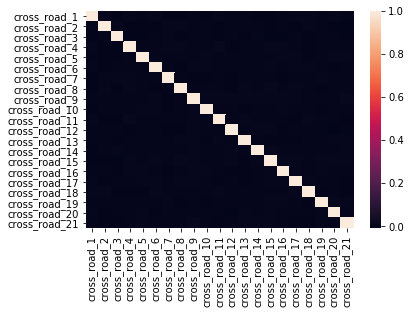

In [9]:
sns.heatmap(df.corr())

In [10]:
X = df.iloc[:,[0,20]].values  # cross roads
X

array([[ 81,   5],
       [ 81,  45],
       [ 75,  18],
       ...,
       [  9, 113],
       [ 27,  62],
       [112,  28]], dtype=int64)

In [11]:
# Building K-means clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [12]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 1, 0])

In [13]:
y_kmeans.size

105336

In [14]:
df['class'] = y_kmeans

In [15]:
df.head()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21,class
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,0
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,0
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,0
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,1
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,0


(array([52809.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 52527.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

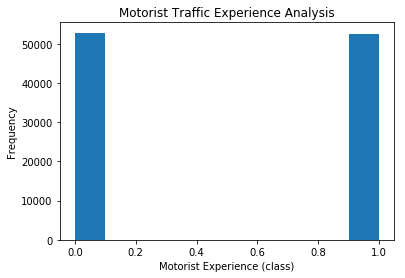

In [23]:
plt.xlabel('Motorist Experience (class)')
plt.ylabel('Frequency')
plt.title('Motorist Traffic Experience Analysis')
plt.hist(df['class'])

In [17]:
df['class'].describe()

count    105336.000000
mean          0.498661
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: class, dtype: float64

In [18]:
x1 = df['cross_road_1']

In [19]:
x1

0          81
1          81
2          75
3          30
4         117
5          47
6          89
7          59
8         112
9         118
10         23
11         52
12         34
13         56
14        106
15          6
16         97
17        118
18         34
19         37
20          8
21         61
22         50
23        117
24         15
25        101
26         28
27         51
28         98
29          1
         ... 
105306    115
105307     68
105308     71
105309     66
105310     43
105311      8
105312     41
105313     31
105314     32
105315    107
105316     81
105317     18
105318     49
105319     10
105320     27
105321     17
105322     79
105323     18
105324     19
105325     54
105326     31
105327     83
105328     65
105329     15
105330     60
105331    108
105332    119
105333      9
105334     27
105335    112
Name: cross_road_1, Length: 105336, dtype: int64

In [20]:
ylabel = df['class']
ylabel

0         0
1         0
2         0
3         1
4         0
5         1
6         0
7         1
8         0
9         0
10        1
11        1
12        1
13        1
14        0
15        1
16        0
17        0
18        1
19        1
20        1
21        0
22        1
23        0
24        1
25        0
26        1
27        1
28        0
29        1
         ..
105306    0
105307    0
105308    0
105309    0
105310    1
105311    1
105312    1
105313    1
105314    1
105315    0
105316    0
105317    1
105318    1
105319    1
105320    1
105321    1
105322    0
105323    1
105324    1
105325    1
105326    1
105327    0
105328    0
105329    1
105330    0
105331    0
105332    0
105333    1
105334    1
105335    0
Name: class, Length: 105336, dtype: int32

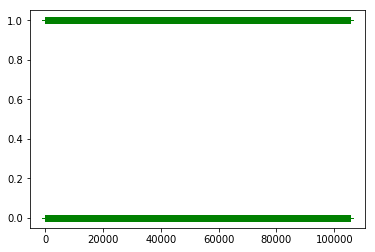

In [28]:
plt.plot(ylabel, 'g+')


Text(0.5,1,'Motorist experience classification at road intersection 1')

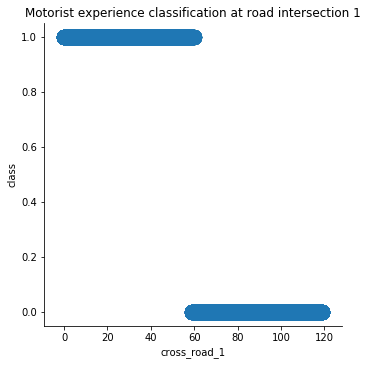

In [36]:
sns.lmplot('cross_road_1', 'class', data=df, fit_reg=False, scatter_kws={"s": 200})
plt.title('Motorist experience classification at road intersection 1')

Text(0.5,1,'Motorist experience classification at road intersection 21')

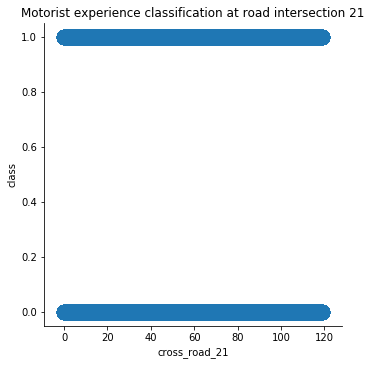

In [40]:
sns.lmplot('cross_road_21', 'class', data=df, fit_reg=False, scatter_kws={"s": 200})
plt.title('Motorist experience classification at road intersection 21')